In [1]:
reads ='/home/nikita/Projects/Chromosomal_aberrations/results_dupl/Caulobacter_BglII_replicate1_dupl/03_filtering/reads12.tsv'

In [2]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads
reso=10000

IMP not found, check PYTHONPATH
/home/nikita/miniconda2/lib/python2.7/site-packages/pytadbit/__init__.py:126: UserWarning: IMP not found, check PYTHONPATH

  warn('IMP not found, check PYTHONPATH\n')


In [3]:
hic_data = load_hic_data_from_reads(reads,  reso)
matrix = hic_data.get_matrix(focus=None, diagonal=True, normalized=False)

In [4]:
len(matrix[0])
import matplotlib.pyplot as plt

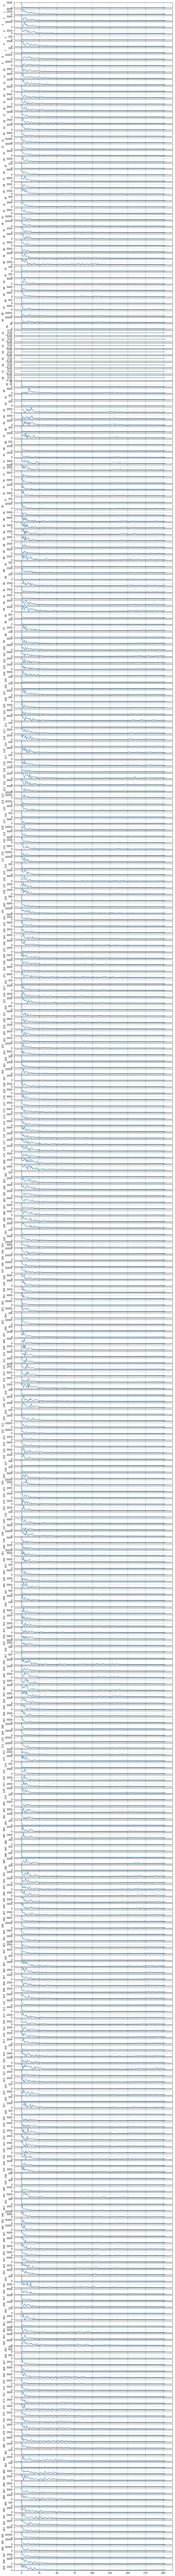

In [5]:
nrows = 400

plt.figure(figsize=(12, 200))
for k in xrange(nrows):
    dist = []
    for d in xrange(1, len(matrix)/2):
        if k - d >= 0 and k         + d < len(matrix):    
            summ = matrix[k][k-d]   + matrix[k][k+d] 
        elif k + d < len(matrix):                     
            summ = matrix[k][k-d]   + matrix[k][k+d] 
        elif k - d >= 0:                         
            summ = matrix[k][k-d]   + matrix[k][k+d-len(matrix)]
        else:                                   
            summ = matrix[k][k-d]   + matrix[k][k+d-len(matrix)]
                           
        
        dist.append(summ)
    plt.subplot(nrows, 1, k + 1)
    plt.plot(dist, alpha=1)
    plt.grid()
    plt.ylabel(k)
plt.show()